In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as num

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read FAO Food Loss csv files
food_loss_data = "../Resources/FAO_Food_Loss.csv"
food_loss = pd.read_csv(food_loss_data)
food_loss = pd.DataFrame(food_loss)
# Filter out the empty columns
food_loss_df = food_loss[["m49_code", "country", "commodity", "year", "loss_percentage", "food_supply_stage"]]
food_loss_df.head()

,m49_code,country,commodity,year,loss_percentage,food_supply_stage
0,104,Myanmar,"Rice, milled",2015,1.78,Storage
1,104,Myanmar,"Rice, milled",2015,11.77,Storage
2,104,Myanmar,"Rice, milled",2015,5.88,Storage
3,104,Myanmar,"Rice, milled",2015,3.57,Storage
4,104,Myanmar,"Rice, milled",2015,17.65,Storage


In [5]:
# Food groups (commodity)
commodity = food_loss_df['commodity'].unique()

# Create food groups by commodity
food_group = {
    'Fruits': ['Tomatoes', 'Cucumbers and gherkins', 'Bananas', 'Plantains and cooking bananas', 'Other fruits, n.e.c.',
           'Papayas', 'Pineapples', 'Pears', 'Apples', 'Oranges', 'Mangoes, guavas and mangosteens',
           'Cantaloupes and other melons', 'Avocados', 'Pomelos and grapefruits', 'Lemons and limes',
           'Tangerines, mandarins, clementines', 'Grapes', 'Other tropical and subtropical fruits, n.e.c.',
           'Strawberries', 'Wine', 'Other citrus fruit, n.e.c.', 'Coconuts, in shell', 'Raspberries', 'Olives',
           'Juice of citrus fruit n.e.c.', 'Juice of lemon', 'Raisins', 'Blueberries', 'Kiwi fruit', 
           'Grape juice', 'Apple juice', 'Cranberries', 'Plums, dried', 'Other stone fruits','Persimmons',
           'Orange juice', 'Pineapple juice', 'Juice of lemon', 'Watermelons', 'Dates', 'Figs', 'Cherries',
           'Plums and sloes', 'Apricots','Areca nuts', 'Peaches and nectarines', 'Other pome fruits', 'Grapefruit juice',
           'Hazelnuts, in shell', 'Walnuts, in shell', 'Cashew nuts, in shell',  'Almonds, in shell', 'Pistachios, in shell'],
    'Vegetables': ['Cauliflowers and broccoli', 'Potatoes', 'Cabbages' 'Eggplants (aubergines)', 'Pumpkins, squash and gourds',
               'Okra', 'Carrots and turnips', 'Green garlic', 'Leeks and other alliaceous vegetables',
               'Onions and shallots, green', 'Spinach', 'Yams', 'Other vegetables, fresh n.e.c.', 'Cassava, fresh',
               'Lettuce and chicory', 'Chillies and peppers, dry (<i>Capsicum</i> spp., <i>Pimenta</i> spp.), raw',
               'Pepper (<i>Piper</i> spp.), raw', 'Cassava, dry', 'Sweet potatoes', 'Artichokes', 'Asparagus',
               'Edible roots and tubers with high starch or inulin content, n.e.c., fresh', 'Flour of cassava', 'Tapioca of cassava',
               'Vegetable products, fresh or dry n.e.c.', 'Sweet corn, frozen', 'Canned mushrooms',
               'Chillies and peppers, green (<i>Capsicum</i> spp. and <i>Pimenta</i> spp.)', 'Mushrooms and truffles',
               'Sweet corn, prepared or preserved', 'Sugar beet', 'Swedes, for forage',
               'Edible roots and tubers with high starch or inulin content, n.e.c., dry',
               'Other stimulant, spice and aromatic crops, n.e.c.'],
    'Dairy': ['Raw milk of cattle', 'Hen eggs in shell, fresh', 'Dairy products n.e.c.', 'Cheese from whole cow milk', 'Eggs, dried'],
    'Protein': ['Meat of cattle with the bone, fresh or chilled', 'Cattle', 'Eggs, dried','Meat of chickens, fresh or chilled',
            'Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails', 'Meat of goat, fresh or chilled', 'Camels',
            'Meat of goat, fresh or chilled (indigenous)', 'Sheep', 'Goats', 'Meat of pig with the bone, fresh or chilled',
            'Meat of sheep, fresh or chilled','Pig meat, cuts, salted, dried or smoked (bacon and ham)'],
    'Grains': ['Rice, milled', 'Rice', 'Wheat', 'Maize (corn)', 'Sorghum', 'Millet', 'Mixed grain', 'Fonio','Quinoa', 'Oats',
           'Broad beans and horse beans, green', 'Flour of triticale', 'Rye', 'Mustard seed', 'Safflower seed',
           'Uncooked pasta, not stuffed or otherwise prepared', 'Green corn (maize)', 'Sugar cane','Rape or colza seed',
           'Cottonseed', 'Sunflower seed', 'Soya bean oil', 'Sunflower-seed oil, crude','Sesame seed','Flour of buckwheat',
           'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw','Cocoa beans', 'Sugar and syrups n.e.c.'],
    'Legumes': ['Beans, dry', 'Other beans, green', 'Peas, green', 'Peas, dry', 'Barley', 'Cow peas, dry', 'Groundnuts, shelled',
            'Broad beans and horse beans, dry' 'Lentils, dry', 'Soya beans', 'Groundnuts, excluding shelled', 'Other pulses n.e.c.',
           'Chick peas, dry', 'Other legumes, for forage', 'Bambara beans, dry', 'Pigeon peas, dry']}

In [7]:
# Add food_group into data frame
food_loss_df['food_group'] = food_loss_df['commodity'].map({commodity: group for group, commodities in food_group.items() for commodity in commodities})

# Count food group total
food_group_count = food_loss_df['food_group'].value_counts()
print(food_group_count)

food_group
Grains        20685
Fruits         3085
Vegetables     2129
Legumes        1216
Dairy           147
Protein          75
Name: count, dtype: int64


In [9]:
# Count how many rows of data each country accounts for; how many each continent accounts for
country_group_count = food_loss_df['country'].value_counts()
print(country_group_count)

country
United States of America    3094
India                       1354
Ethiopia                    1064
Kenya                       1054
Uganda                       866
                            ... 
Bahrain                        1
Oman                           1
Saint Kitts and Nevis          1
Germany                        1
Gabon                          1
Name: count, Length: 127, dtype: int64


<Figure size 1200x800 with 0 Axes>

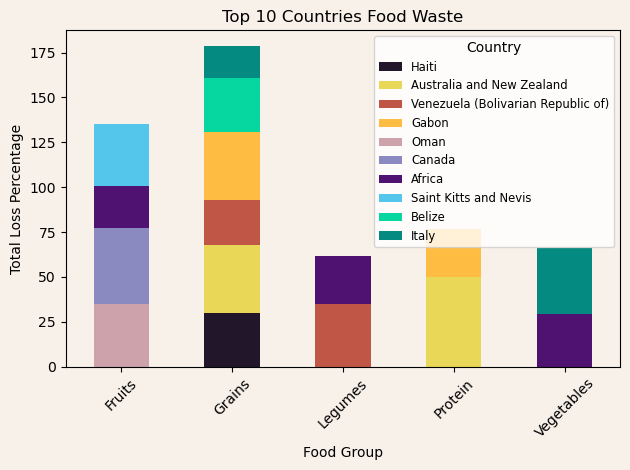

In [15]:
# Create stacked bar graph
country_waste = food_loss_df.groupby('country')['loss_percentage'].mean()
country_waste_sorted = country_waste.nlargest(10)
country_waste_data = food_loss_df[food_loss_df['country'].isin(country_waste_sorted.index)]

custom_colors = ['#22162B', '#E9D758', '#C05746', '#FFBC42', '#CDA2AB', '#8A89C0', '#4F1271', '#54C6EB', '#06D6A0', '#048A81']

plt.figure(figsize=(12, 8))
country_waste_data.pivot_table(index='food_group', columns='country', values='loss_percentage').plot(kind='bar', color=custom_colors, stacked=True)
plt.title('Top 10 Countries Food Waste')
plt.xlabel('Food Group')
plt.ylabel('Total Loss Percentage')
plt.xticks(rotation=45)
plt.legend(title='Country', fontsize='small', loc='upper right', labels=country_waste_sorted.index)
plt.tight_layout()

# Match background to slides
plt.gca().set_facecolor('#F8F1E9')  # For plot area
plt.gcf().set_facecolor('#F8F1E9')  # For background of fig
plt.savefig('viz/country_waste.png')

In [ ]:
# Pie Chart
custom_colors = ['#06D6A0', '#048A81', '#54C6EB', '#CDA2AB', '#8A89C0', '#F1D87E']
explode = (0, 0.1, 0, 0, 0, 0)

pie_chart = food_loss_df.groupby('food_group')['loss_percentage'].mean()

pie_chart.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode, colors=custom_colors)
plt.title('Food Wastage by Food Group')
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the figure
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.savefig('viz/pie_food_group_waste_MEAN.png')

In [ ]:
# Pie Chart
custom_colors = ['#06D6A0', '#048A81', '#54C6EB', '#CDA2AB', '#8A89C0', '#F1D87E']
explode = (0, 0.1, 0, 0, 0, 0)

pie_chart = food_loss_df.groupby('food_group')['loss_percentage'].sum()

pie_chart.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode, colors=custom_colors)
plt.title('Food Wastage by Food Group')
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the figure
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.savefig('viz/pie_food_group_waste_SUM.png')